### LOAD THE DATA

[[ 0.10117974  1.09312989]
 [-0.1344052   1.01127634]
 [-0.08798433  1.02087317]
 [ 0.02863047  1.03105045]
 [ 0.15401246  1.05586286]
 [ 0.18790678  0.96940002]
 [-0.468706    0.95380176]
 [-0.76232593  1.15672593]
 [ 0.01109058  0.91598746]
 [ 0.0210233   0.9699809 ]]
[0 0 0 0 0 0 0 0 0 0]


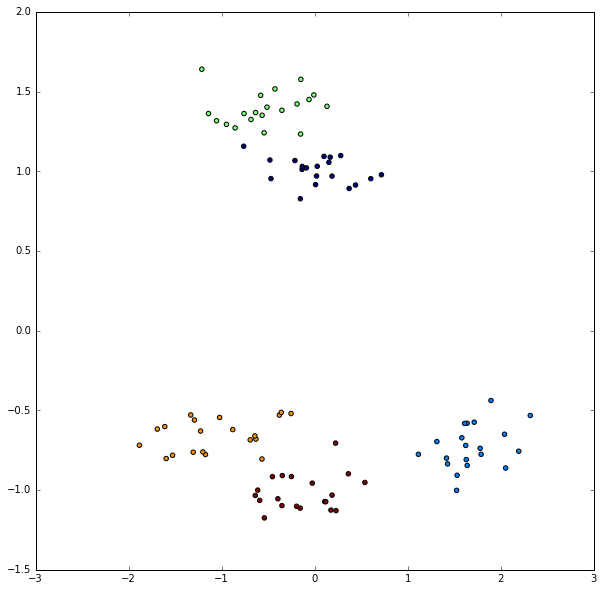

In [104]:
data_0 = np.load('cluster1_data_scaled.npy')
clusters_0  = np.load('cluster1_answers.npy')
print(data_0[:10])
print(clusters_0[:10])
plt.scatter(data_0[:,0],data_0[:,1],c=clusters_0)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

### SPLITTING THE DATA - VALIDATION STRATEGIES:    
<b>
1. Train-Test Split   
2. Train-Validation-Test Split    
3. K-Fold Cross Validaton

### 1. TRAIN-TEST SPLIT 

In [163]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data_0, 
                                                 clusters_0,
                                                 test_size=.33,
                                                 random_state=2)

In [164]:
print(len(x_train),x_train[:10])
print(len(y_train),y_train[:10])
print('')
print(len(x_test),x_test[:10])
print(len(y_test),y_test[:10])

(67, array([[-0.06000569,  1.44997025],
       [ 1.78064459, -0.73806082],
       [-0.64233288, -0.66020529],
       [-0.468706  ,  0.95380176],
       [-0.35083276, -1.09733221],
       [-0.1543098 , -1.11305037],
       [ 0.44010741,  0.91350711],
       [ 0.37130013,  0.89181228],
       [-0.63420626,  1.367949  ],
       [-0.63749115, -1.03356637]]))
(67, array([2, 1, 3, 0, 4, 4, 0, 0, 2, 4]))

(33, array([[ 0.17590658, -1.1252547 ],
       [ 1.58354736, -0.67207752],
       [-0.75833463,  1.36179572],
       [ 1.41849088, -0.7994436 ],
       [ 0.16789825,  1.08808596],
       [ 2.05467847, -0.86164437],
       [-0.08798433,  1.02087317],
       [ 1.71653361, -0.57419936],
       [ 1.64066071, -0.58073757],
       [ 0.60446767,  0.95356871]]))
(33, array([4, 1, 2, 1, 0, 1, 0, 1, 1, 0]))


><b>FIRST PREDICTION:

In [165]:
from sklearn import svm
from sklearn.metrics import accuracy_score

svc = svm.SVC(kernel='linear',C=2).fit(x_train,y_train)
predictions = svc.predict(x_test)

print(predictions)
print(y_test)
accuracy_score(predictions,y_test)

[4 1 2 1 0 1 0 1 1 0 4 4 3 0 0 1 0 1 3 3 1 0 4 2 3 0 1 3 3 3 3 0 0]
[4 1 2 1 0 1 0 1 1 0 4 4 3 0 0 1 0 1 3 3 1 0 4 2 3 0 1 3 3 3 3 0 0]


1.0

><b> @ C == 2 this looks great! Is it the same if we load a different combination of random split from the data?:

In [166]:
x_train,x_test,y_train,y_test = train_test_split(data_0, 
                                                 clusters_0,
                                                 test_size=.33,
                                                 random_state=10)
                                                 #changing random state
                                                 #produces different
                                                 #sample-split
predictions = svc.predict(x_test)
accuracy_score(predictions,y_test)

0.96969696969696972

><b> Guess not, what kind of C-parameter would give us 100% now?

In [186]:
c_params = [1,4,8,9,10]
for param in c_params:
    svc = svm.SVC(kernel='linear',C=param).fit(x_train,y_train)
    predictions = svc.predict(x_test)
    print(accuracy_score(predictions,y_test))

0.909090909091
0.969696969697
0.969696969697
0.969696969697
1.0


### Looks like a single instance of train-test validation just won't cut it.. Is this because the model is overfitted to the training-dataset?

## 2. TRAIN-VALIDATION-TEST (THREEFOLD) SPLIT:

><b>SPLIT THE DATASET TWICE:    
FIRST SPLIT 1/1 INTO 1/4 and 3/4   
THEN SPLIT THE 3/4 into 2/3 and 1/3      

><b>FIRST SPLIT THE_WHOLE INTO TRAINING_SET AND TEST_SET     
THEN SPLIT THE TRAINING_SET INTO TRAINING_SET AND VALIDATION_SET    
WHAT'S LEFT IS 50%TRAINING,25%VALIDATION,AND 25%TESTING 

In [338]:
from sklearn.cross_validation import train_test_split

x_trainval, x_test, y_trainval,y_test = (
    train_test_split(x,y,random_state = 0))

x_train, x_valid,y_train,y_valid = (train_test_split(x_trainval,
                                                     y_trainval,
                                                     random_state = 1,
                                                     test_size = .33))

print('full_sample',len(x))
print('training_set',len(x_trainval))
print('test_set',len(x_test))
print('')
print('training_set',len(x_trainval))
print('new_training_set',len(x_train))
print('validation_set',len(x_valid))

('full_sample', 100)
('training_set', 75)
('test_set', 25)

('training_set', 75)
('new_training_set', 50)
('validation_set', 25)


---

## 3. NOW LET'S HACK ON THIS ALGORITHM:

In [350]:
from sklearn.svm import SVC

svm = SVC(C = 1000000000)
svm.fit(x_train,y_train)
svm.score(x_valid,y_valid)

0.95999999999999996

#### GRIDSEARCH HYPERPARAMETER TUNING:
<b>Gridsearch is all the combinations of two lists of scores

<b>
Main SVC hyperparamaters are:    
1) C = sensetivity to outliers   
2) Gamma = width of the gaussian kernel  

### Lets build a helper_function to find optimal hyperparameters to score training data against the validation_set

In [490]:
c_grid = [.001,.01,.1,1,10,100]
gamma_grid = [.001,.01,.1,1,10,100]

def svm_grid_search(c_grid,gamma_grid,num_rows):
    import pprint
    
    grid = []
    for C in c_grid:
        for gamma in gamma_grid:
            svm = SVC(gamma=gamma, C=C)
            svm.fit(x_train,y_train)
            score = svm.score(x_valid,y_valid)
            grid.append([score,C,gamma])
    grid = sorted(grid,reverse=True)
    print('BEST IN GRID:')    
    print(['Score','C_val','Gamma'])
    pprint.pprint(grid[:num_rows])
    print('')
    
    
    print('VALIDATION SCORES:')
    print(["C",'gamma','test_score'])
    meta_grid = []
    for x in grid[:num_rows]:
        svm = SVC(C=float(x[1]), gamma=float(x[2]))
        svm.fit(x_train,y_train)
        score = svm.score(x_valid,y_valid)        
        print(x[1],x[2],score)
        meta_grid.append([x[1],x[2]])
    best_scores = []
    for h_param in meta_grid:
        svm = SVC(C=h_param[0],gamma=h_param[1])
        svm.fit(x_train,y_train)
        final_score = svm.score(x_test,y_test)
        best_scores.append([h_param[0],h_param[1],final_score])
    print('')
    print('FINAL TEST SCORES')
    print(["C",'gamma','final_score']) 
    pprint.pprint(best_scores)
     
svm_grid_search(c_grid,gamma_grid,10)

BEST IN GRID:
['Score', 'C_val', 'Gamma']
[[1.0, 100, 0.01],
 [1.0, 10, 0.1],
 [0.95999999999999996, 100, 10],
 [0.95999999999999996, 100, 1],
 [0.95999999999999996, 100, 0.1],
 [0.95999999999999996, 10, 10],
 [0.95999999999999996, 10, 1],
 [0.95999999999999996, 1, 10],
 [0.95999999999999996, 1, 1],
 [0.88, 100, 0.001]]

VALIDATION SCORES:
['C', 'gamma', 'test_score']
(100, 0.01, 1.0)
(10, 0.1, 1.0)
(100, 10, 0.95999999999999996)
(100, 1, 0.95999999999999996)
(100, 0.1, 0.95999999999999996)
(10, 10, 0.95999999999999996)
(10, 1, 0.95999999999999996)
(1, 10, 0.95999999999999996)
(1, 1, 0.95999999999999996)
(100, 0.001, 0.88)

FINAL TEST SCORES
['C', 'gamma', 'final_score']
[[100, 0.01, 0.95999999999999996],
 [10, 0.1, 0.95999999999999996],
 [100, 10, 0.95999999999999996],
 [100, 1, 0.95999999999999996],
 [100, 0.1, 0.95999999999999996],
 [10, 10, 0.95999999999999996],
 [10, 1, 0.95999999999999996],
 [1, 10, 0.95999999999999996],
 [1, 1, 0.95999999999999996],
 [100, 0.001, 0.9200000000000

### Looks like the top 9 combinations of C and gamma produce a 96% accuracy score!

---

### CODEX

In [3]:
import pandas as pd
from __future__ import division
import random
import numpy as np
from numpy import random, array, float
import matplotlib.pyplot as plt
%matplotlib inline

---